In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#import data
df = pd.read_pickle(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\full_customers.pkl')


# Exercise

In [3]:
#use crosstab to confirm that missing values in days_since_prior_order = new customer
crosstab=pd.crosstab(df['days_since_prior_order'],df['order_number'], dropna=False )

In [4]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
days_since_prior_order,,,,,,,,,,,,,,,,,,,,,
0.0,0,20562,20452,17998,16451,16061,14396,13896,12782,11471,...,1195,1150,1040,937,1136,1099,1041,884,1038,936
1.0,0,31693,29975,28025,27109,25545,25013,22935,21797,21081,...,2790,2803,2729,2606,2606,2641,2437,2540,2635,2365
2.0,0,46489,46298,43933,40757,40944,38138,37560,35776,33861,...,3624,3558,3314,3592,3323,3073,2986,3058,3092,2612
3.0,0,61701,63450,60047,57931,56219,52916,49333,48324,47858,...,3321,3239,2799,3079,2904,2638,2661,2462,2170,2468
4.0,0,76794,78922,73606,70592,66629,62452,61200,59568,57743,...,2344,2260,2492,2032,1800,2083,1918,1795,1695,1813
5.0,0,89103,91826,86577,81933,77645,73637,70078,64515,63201,...,1630,1633,1368,984,1216,1222,1168,966,912,936
6.0,0,120786,123008,114762,106859,100838,96045,89830,87290,78707,...,754,842,942,1014,837,571,490,602,485,544
7.0,0,184973,181825,167756,157591,143768,137803,128561,120840,114884,...,636,575,521,440,602,422,421,378,419,323
8.0,0,112446,110849,102316,95041,87712,81714,78825,71139,67639,...,239,262,228,244,275,232,235,143,137,84


In [5]:
#save results to clipboard
crosstab.to_clipboard()

# Task

# 2.

In [6]:
#Address any PII 
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,behavior_flag,first_name,last_name,gender,state,age,date_joined,dependents,marital_status,income
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
#drop columns with names
df= df.drop(columns = ['first_name'])

In [8]:
df= df.drop(columns = ['last_name'])

# 3.

In [9]:
#view state value counts
df['state'].value_counts(dropna= False)

Pennsylvania            667710
California              660447
Rhode Island            657655
Georgia                 657072
New Mexico              655143
Arizona                 654545
North Carolina          652338
Oklahoma                652263
Alaska                  649020
Minnesota               648408
Massachusetts           647000
Wyoming                 644929
Virginia                642075
Missouri                641313
Texas                   641058
Colorado                639752
Maine                   639149
North Dakota            638999
Alabama                 638617
Louisiana               638174
Kansas                  637991
Delaware                637447
South Carolina          637348
Oregon                  636949
Arkansas                636706
Nevada                  636697
New York                636697
Montana                 635835
South Dakota            634340
Illinois                633490
Hawaii                  633445
Washington              633421
Mississi

In [10]:
# Create a regional segmentation of the data
regions = []
for value in df["state"]:
    if (value == "Maine" or value == "Vermont" or value == "New Hampshire" or value =="Massachusetts"  or value =="Rhode Island"  or value =="Connecticut" or value == "New York" or value== "Pennsylvania" or value == "New Jersey" ):
        regions.append("North East")
    elif (value == "Wisconsin" or value== "Michigan" or value== "Illinois" or value== "Indiana" or value== "Ohio" or value== "North Dakota" or value== "South Dakota" or value== "Nebraska" or value== "Kansas" or value== "Minnesota" or value== "Iowa" or value== "Missouri"):
        regions.append("Mid West")
    elif (value == "Delaware" or value== "Maryland" or value== "District of Columbia" or value== "Virginia" or value== "West Virginia" or value== "North Carolina" or value== "South Carolina" or value== "Georgia" or value== "Florida" or value== "Kentucky" or value== "Tennessee" or value== "Mississippi" or value== "Alabama" or value== "Oklahoma" or value== "Texas" or value== "Arkansas" or value== "Louisiana"):
        regions.append("South")
    elif (value == "Idaho" or value== "Montana" or value== "Wyoming" or value== "Nevada" or value== "Utah" or value== "Colorado" or value == "Arizona" or value== "New Mexico" or value== "Alaska" or value== "Washington" or value== "Oregon" or value== "California" or value== "Hawaii"):
        regions.append("West")
    else:
        regions.append("Error")

In [11]:
regions

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid West',
 'Mid W

In [12]:
#create a new variable to display customer region
df['country_region']= regions

In [13]:
df['country_region'].value_counts(dropna= False)

South         10801610
West           8300445
Mid West       7603810
North East     5728347
Name: country_region, dtype: int64

In [14]:
# Is there a difference in spending habits between the different US regions?

In [15]:
#median price of products bought by region
df.groupby(['country_region']).agg({'prices':['median']})

,prices
,median
country_region,
Mid West,7.4
North East,7.4
South,7.4
West,7.4


In [16]:
# total sales by region
df.groupby(['country_region']).agg({'prices':['sum']})

,prices
,sum
country_region,
Mid West,9.668811e+07
North East,6.619906e+07
South,1.317394e+08
West,9.397244e+07


In [17]:
#total order number by region
df.groupby(['country_region']).agg({'order_number':['sum']})

,order_number
,sum
country_region,
Mid West,128692591
North East,98617491
South,185248791
West,143425956


In [18]:
#median days since prior order by region
df.groupby(['country_region']).agg({'days_since_prior_order':['median']})

,days_since_prior_order
,median
country_region,
Mid West,8.0
North East,8.0
South,8.0
West,8.0


In [19]:
#median hour orders are placed by region
df.groupby(['country_region']).agg({'order_hour_of_day':['median']})

,order_hour_of_day
,median
country_region,
Mid West,13
North East,13
South,13
West,13


The regions seem to have similar spending habits with the exception of the South having more orders placed, therefore earning more total revenue.

# 4.

In [20]:
#create exclusion flag for low-activity customers (less than 5 orders) and exclude them from the data

In [21]:
df.shape

(32434212, 32)

In [22]:
df['activity_category'] = df.groupby(['user_id'])['order_number'].transform('max')

In [23]:
df.loc[df['activity_category']>=5, 'activity_flag']= 'High Activity'
df.loc[df['activity_category']<5, 'activity_flag']= 'Low Activity'

In [24]:
#view value_counts
df['activity_flag'].value_counts(dropna= False)

High Activity    30992664
Low Activity      1441548
Name: activity_flag, dtype: int64

In [25]:
#export customers with low activity
low_activity= df.copy()

In [26]:
low_activity= low_activity[low_activity.activity_category <5]

In [27]:
low_activity

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,gender,state,age,date_joined,dependents,marital_status,income,country_region,activity_category,activity_flag
1513,520620,120,1,3,11,NaN,New Customer,196,2,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,Low Activity
1514,3273029,120,3,2,8,19.0,Returning Customer,196,2,1,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,Low Activity
1515,520620,120,1,3,11,NaN,New Customer,46149,1,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,Low Activity
1516,3273029,120,3,2,8,19.0,Returning Customer,46149,1,1,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,Low Activity
1517,520620,120,1,3,11,NaN,New Customer,26348,3,0,...,Female,Kentucky,54,3/2/2017,2,married,99219,South,3,Low Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434181,1947537,166751,3,4,7,0.0,Returning Customer,49001,1,1,...,Female,Oregon,38,8/17/2018,1,married,41766,West,3,Low Activity
32434208,484769,66343,1,6,11,NaN,New Customer,47210,1,0,...,Female,Tennessee,22,9/12/2017,3,married,46151,South,4,Low Activity
32434209,1561557,66343,2,1,11,30.0,Returning Customer,47210,1,1,...,Female,Tennessee,22,9/12/2017,3,married,46151,South,4,Low Activity
32434210,276317,66343,3,6,15,19.0,Returning Customer,47210,1,1,...,Female,Tennessee,22,9/12/2017,3,married,46151,South,4,Low Activity


In [28]:
low_activity.shape

(1441548, 34)

In [29]:
low_activity['activity_flag'].value_counts(dropna= False)

Low Activity    1441548
Name: activity_flag, dtype: int64

In [30]:
#save low activity members
low_activity.to_pickle(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\low_activity_customers.pkl')

In [31]:
#remove low activity customers from working dataframe
df= df[df.activity_category >=5]

In [32]:
df['activity_flag'].value_counts(dropna= False)

High Activity    30992664
Name: activity_flag, dtype: int64

In [33]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', '_merge', 'price_range_loc',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_category', 'spending_flag', 'behavior_category',
       'behavior_flag', 'gender', 'state', 'age', 'date_joined', 'dependents',
       'marital_status', 'income', 'country_region', 'activity_category',
       'activity_flag'],
      dtype='object')

In [34]:
df.shape

(30992664, 34)

# 5.

In [35]:
#create a profiling variable based on age, income, certain goods based on department, and dependents
#order day of week and hour of day may also be used if you can think of how they impact customer profiles
#ex. what characteristics would lead to profile single adult or young parent?


### Pet Owner Proflie

In [36]:
#create pet owners profile 
pets=pd.crosstab(df['user_id'],df['department_id']==8, dropna=False )

In [37]:
pets

department_id,False,True
user_id,,
1,59,0
2,195,0
3,88,0
4,18,0
7,205,1
...,...,...
206203,119,0
206206,285,0
206207,223,0


In [38]:
#move to excel for further manipulation
pets.to_clipboard()

In [39]:
#import pet owners table from excel
owners= pd.read_csv(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\Pet_owners.csv')

In [40]:
owners

,user_id,Pet_Owner_Profile
0,7,Pet Owner
1,12,Pet Owner
2,28,Pet Owner
3,49,Pet Owner
4,65,Pet Owner
...,...,...
13170,206165,Pet Owner
13171,206166,Pet Owner
13172,206168,Pet Owner
13173,206176,Pet Owner


In [41]:
#number of pet owners
owners['Pet_Owner_Profile'].value_counts(dropna= False)

Pet Owner    13175
Name: Pet_Owner_Profile, dtype: int64

In [42]:
#rename merge column so we can add another merge
df.rename(columns = {'_merge' : 'merged'}, inplace = True)

In [43]:
# merge pet owners with original df
df_merged_pets = df.merge(owners, on = 'user_id', how= 'outer', indicator = True)

In [44]:
df_merged_pets

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,age,date_joined,dependents,marital_status,income,country_region,activity_category,activity_flag,Pet_Owner_Profile,_merge
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,31,2/17/2019,3,married,40423,South,10,High Activity,NaN,left_only
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,NaN,left_only
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,NaN,left_only
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,NaN,left_only
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992659,3308056,106143,22,4,20,10.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,NaN,left_only
30992660,2988973,106143,23,2,22,5.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,NaN,left_only
30992661,930,106143,24,6,12,4.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,NaN,left_only
30992662,467253,106143,25,6,16,7.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,NaN,left_only


In [45]:
#view value count
df_merged_pets['Pet_Owner_Profile'].value_counts(dropna= False)

NaN          27539023
Pet Owner     3453641
Name: Pet_Owner_Profile, dtype: int64

In [46]:
#assign "no pets" to users who are not pet owners
df_merged_pets['Pet_Owner_Profile']=df_merged_pets['Pet_Owner_Profile'].fillna("No Pets")

In [47]:
df_merged_pets['Pet_Owner_Profile'].value_counts(dropna= False)

No Pets      27539023
Pet Owner     3453641
Name: Pet_Owner_Profile, dtype: int64

In [48]:
df_merged_pets

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,age,date_joined,dependents,marital_status,income,country_region,activity_category,activity_flag,Pet_Owner_Profile,_merge
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,31,2/17/2019,3,married,40423,South,10,High Activity,No Pets,left_only
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,No Pets,left_only
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,No Pets,left_only
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,No Pets,left_only
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,31,2/17/2019,3,married,40423,South,10,High Activity,No Pets,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992659,3308056,106143,22,4,20,10.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,No Pets,left_only
30992660,2988973,106143,23,2,22,5.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,No Pets,left_only
30992661,930,106143,24,6,12,4.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,No Pets,left_only
30992662,467253,106143,25,6,16,7.0,Returning Customer,19675,1,1,...,25,5/26/2017,0,single,53755,West,26,High Activity,No Pets,left_only


In [49]:
#dataframe is too large so we will decide which columns to remove
df_merged_pets.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merged', 'price_range_loc',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_category', 'spending_flag', 'behavior_category',
       'behavior_flag', 'gender', 'state', 'age', 'date_joined', 'dependents',
       'marital_status', 'income', 'country_region', 'activity_category',
       'activity_flag', 'Pet_Owner_Profile', '_merge'],
      dtype='object')

In [50]:
# dataframe is too large so will drop these unnecessary columns
df_merged_pets=df_merged_pets.drop(columns = ['_merge','order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merged', 'price_range_loc',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_category', 'spending_flag', 'behavior_category',
       'behavior_flag', 'gender', 'state', 'age', 'date_joined', 'dependents',
       'marital_status', 'income', 'country_region', 'activity_category',
       'activity_flag'])

In [51]:
df_merged_pets

,user_id,Pet_Owner_Profile
0,1,No Pets
1,1,No Pets
2,1,No Pets
3,1,No Pets
4,1,No Pets
...,...,...
30992659,106143,No Pets
30992660,106143,No Pets
30992661,106143,No Pets
30992662,106143,No Pets


### Diet Profile

In [52]:
#create diet profile
#customers who do not buy from departmnts: 12,16,20 may be vegan
#customers who do not buy from departmnts: 12 but do buy from 16,20 may be vegetarian
#customers who buy from department 12 are carnivores

diet =pd.crosstab(df['user_id'],df['department_id'], dropna=False )

In [53]:
diet

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,5,0,0,13,0,0,0,...,0,1,3,0,13,2,0,22,0,0
2,17,0,2,36,0,3,9,0,0,0,...,1,11,3,1,48,0,0,42,21,0
3,6,0,0,38,0,0,3,0,4,0,...,0,4,0,0,21,1,0,9,2,0
4,3,0,2,2,2,0,3,0,0,0,...,0,0,0,1,0,2,0,1,2,0
7,4,0,5,57,0,0,51,1,0,0,...,8,9,0,6,32,1,0,19,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206203,14,0,3,36,0,0,19,0,0,1,...,3,9,0,8,14,2,0,8,1,0
206206,76,1,2,34,0,4,33,0,1,0,...,2,14,1,9,39,12,0,42,5,0
206207,21,0,3,50,0,1,20,0,8,0,...,6,15,4,11,52,0,1,23,8,0


In [54]:
diet.to_clipboard()

In [55]:
diet= pd.read_csv(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\diet.csv')

In [56]:
# merge diet with original df
profiles_pets_diet = df_merged_pets.merge(diet, on = 'user_id', how= 'outer', indicator = True)

In [57]:
#view new profile dataframe
profiles_pets_diet

,user_id,Pet_Owner_Profile,Diet_Profile,_merge
0,1,No Pets,NaN,left_only
1,1,No Pets,NaN,left_only
2,1,No Pets,NaN,left_only
3,1,No Pets,NaN,left_only
4,1,No Pets,NaN,left_only
...,...,...,...,...
30992659,106143,No Pets,NaN,left_only
30992660,106143,No Pets,NaN,left_only
30992661,106143,No Pets,NaN,left_only
30992662,106143,No Pets,NaN,left_only


In [58]:
profiles_pets_diet=profiles_pets_diet.drop(columns = ['_merge'])

In [59]:
#view diet profile value counts
profiles_pets_diet['Diet_Profile'].value_counts(dropna= False)

Carnivore Diet     23075225
Vegetarian Diet     5135243
NaN                 2614522
Vegan Diet           167674
Name: Diet_Profile, dtype: int64

In [60]:
#users who do not fit any of the diet profiles will have their diet as "undetermined"
profiles_pets_diet['Diet_Profile']=profiles_pets_diet['Diet_Profile'].fillna("Undetermined")

In [61]:
#view diet profile value counts
profiles_pets_diet['Diet_Profile'].value_counts(dropna= False)

Carnivore Diet     23075225
Vegetarian Diet     5135243
Undetermined        2614522
Vegan Diet           167674
Name: Diet_Profile, dtype: int64

### Wealth Profile

In [62]:
df['income'].describe()

count    3.099266e+07
mean     9.967322e+04
std      4.313928e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

In [63]:
df['income_category'] = df.groupby(['user_id'])['income'].transform('max')

In [64]:
df.loc[df['income_category']<=67289, 'income_flag']= 'Lower Income'

In [65]:
df.loc[(df['income_category']<128101) & (df['income_category']>67289), 'income_flag']= 'Average Income'

In [66]:
df.loc[df['income_category']>=128101, 'income_flag']= 'Higher Income'

In [67]:
df['income_flag'].value_counts(dropna= False)

Average Income    15496108
Lower Income       7748290
Higher Income      7748266
Name: income_flag, dtype: int64

In [68]:
wealth =pd.crosstab(df['user_id'], df['income_flag'], dropna=False )

In [69]:
wealth

income_flag,Average Income,Higher Income,Lower Income
user_id,,,
1,0,0,59
2,0,0,195
3,88,0,0
4,0,0,18
7,206,0,0
...,...,...,...
206203,119,0,0
206206,285,0,0
206207,223,0,0


In [70]:
wealth.to_clipboard()

In [71]:
wealth= pd.read_csv(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\income.csv')

In [72]:
wealth

,user_id,Income_Profile
0,1,Lower Income
1,2,Lower Income
2,4,Lower Income
3,10,Lower Income
4,15,Lower Income
...,...,...
162628,206182,Higher Income
162629,206189,Higher Income
162630,206199,Higher Income
162631,206208,Higher Income


In [73]:
# merge wealth with original df
profiles_pets_diet_wealth = profiles_pets_diet.merge(wealth, on = 'user_id', how= 'outer', indicator = True)

In [74]:
profiles_pets_diet_wealth

,user_id,Pet_Owner_Profile,Diet_Profile,Income_Profile,_merge
0,1,No Pets,Undetermined,Lower Income,both
1,1,No Pets,Undetermined,Lower Income,both
2,1,No Pets,Undetermined,Lower Income,both
3,1,No Pets,Undetermined,Lower Income,both
4,1,No Pets,Undetermined,Lower Income,both
...,...,...,...,...,...
30992659,106143,No Pets,Undetermined,Lower Income,both
30992660,106143,No Pets,Undetermined,Lower Income,both
30992661,106143,No Pets,Undetermined,Lower Income,both
30992662,106143,No Pets,Undetermined,Lower Income,both


In [75]:
profiles_pets_diet_wealth=profiles_pets_diet_wealth.drop(columns = ['_merge'])

In [76]:
#view income profile value counts
profiles_pets_diet_wealth['Income_Profile'].value_counts(dropna= False)

Average Income    15496108
Lower Income       7748290
Higher Income      7748266
Name: Income_Profile, dtype: int64

### Age

In [77]:
df['age'].describe()

count    3.099266e+07
mean     4.946793e+01
std      1.848520e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [78]:
df['aged'] = df.groupby(['user_id'])['age'].transform('max')

In [79]:
df.loc[df['age']<40, 'Age_Profile']= 'Younger'

In [80]:
df.loc[(df['age']<60) & (df['age']>=40), 'Age_Profile']= 'Middle Aged'

In [81]:
df.loc[df['age']>=60, 'Age_Profile']= 'Older'

In [82]:
df['Age_Profile'].value_counts(dropna= False)

Younger        10674650
Older          10583941
Middle Aged     9734073
Name: Age_Profile, dtype: int64

In [83]:
#crosstab of age of users
age=pd.crosstab(df['user_id'],df['Age_Profile'], dropna=False )

In [84]:
age

Age_Profile,Middle Aged,Older,Younger
user_id,,,
1,0,0,59
2,0,195,0
3,0,0,88
4,0,0,18
7,0,0,206
...,...,...,...
206203,0,119,0
206206,0,0,285
206207,0,223,0


In [85]:
age.to_clipboard()

In [86]:
age_profile= pd.read_csv(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\age.csv')

In [87]:
# merge diet with original df
profiles_pets_diet_wealth_age = profiles_pets_diet_wealth.merge(age_profile, on = 'user_id', how= 'outer', indicator = True)

In [88]:
profiles_pets_diet_wealth_age

,user_id,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile,_merge
0,1,No Pets,Undetermined,Lower Income,Younger,both
1,1,No Pets,Undetermined,Lower Income,Younger,both
2,1,No Pets,Undetermined,Lower Income,Younger,both
3,1,No Pets,Undetermined,Lower Income,Younger,both
4,1,No Pets,Undetermined,Lower Income,Younger,both
...,...,...,...,...,...,...
30992659,106143,No Pets,Undetermined,Lower Income,Younger,both
30992660,106143,No Pets,Undetermined,Lower Income,Younger,both
30992661,106143,No Pets,Undetermined,Lower Income,Younger,both
30992662,106143,No Pets,Undetermined,Lower Income,Younger,both


In [89]:
profiles_pets_diet_wealth_age=profiles_pets_diet_wealth_age.drop(columns = ['_merge'])

In [90]:
profiles_pets_diet_wealth_age['Age_Profile'].value_counts(dropna= False)

Younger        10674650
Older          10583941
Middle Aged     9734073
Name: Age_Profile, dtype: int64

### Family Status

In [91]:
#crosstab of user's dependent status
family=pd.crosstab(df['user_id'],df['dependents'], dropna=False )

In [92]:
family

dependents,0,1,2,3
user_id,,,,
1,0,0,0,59
2,0,0,0,195
3,0,0,0,88
4,0,0,0,18
7,0,0,206,0
...,...,...,...,...
206203,0,0,0,119
206206,0,0,285,0
206207,0,223,0,0


In [93]:
family.to_clipboard()

In [94]:
#import manipulated family dataset
family_profile= pd.read_csv(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\family.csv')

In [95]:
# merge diet with original df
profiles_pets_diet_wealth_age_family = profiles_pets_diet_wealth_age.merge(family_profile, on = 'user_id', how= 'outer', indicator = True)

In [96]:
profiles_pets_diet_wealth_age_family

,user_id,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile,Family_Status_Profile,_merge
0,1,No Pets,Undetermined,Lower Income,Younger,Family,both
1,1,No Pets,Undetermined,Lower Income,Younger,Family,both
2,1,No Pets,Undetermined,Lower Income,Younger,Family,both
3,1,No Pets,Undetermined,Lower Income,Younger,Family,both
4,1,No Pets,Undetermined,Lower Income,Younger,Family,both
...,...,...,...,...,...,...,...
30992659,106143,No Pets,Undetermined,Lower Income,Younger,Individual,both
30992660,106143,No Pets,Undetermined,Lower Income,Younger,Individual,both
30992661,106143,No Pets,Undetermined,Lower Income,Younger,Individual,both
30992662,106143,No Pets,Undetermined,Lower Income,Younger,Individual,both


In [97]:
profiles_pets_diet_wealth_age_family =profiles_pets_diet_wealth_age_family.drop(columns = ['_merge'])

In [98]:
profiles_pets_diet_wealth_age_family['Family_Status_Profile'].value_counts(dropna= False)

Family        23245632
Individual     7747032
Name: Family_Status_Profile, dtype: int64

In [99]:
#remove all duplictes
df_dups= profiles_pets_diet_wealth_age_family[profiles_pets_diet_wealth_age_family.duplicated()]
df_dups

,user_id,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile,Family_Status_Profile
1,1,No Pets,Undetermined,Lower Income,Younger,Family
2,1,No Pets,Undetermined,Lower Income,Younger,Family
3,1,No Pets,Undetermined,Lower Income,Younger,Family
4,1,No Pets,Undetermined,Lower Income,Younger,Family
5,1,No Pets,Undetermined,Lower Income,Younger,Family
...,...,...,...,...,...,...
30992659,106143,No Pets,Undetermined,Lower Income,Younger,Individual
30992660,106143,No Pets,Undetermined,Lower Income,Younger,Individual
30992661,106143,No Pets,Undetermined,Lower Income,Younger,Individual
30992662,106143,No Pets,Undetermined,Lower Income,Younger,Individual


In [100]:
profiles_pets_diet_wealth_age_family.shape

(30992664, 6)

In [101]:
profiles_pets_diet_wealth_age_family=profiles_pets_diet_wealth_age_family.drop_duplicates()

In [102]:
profiles_pets_diet_wealth_age_family.shape

(162633, 6)

In [103]:
profiles_pets_diet_wealth_age_family

,user_id,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile,Family_Status_Profile
0,1,No Pets,Undetermined,Lower Income,Younger,Family
59,15,No Pets,Undetermined,Lower Income,Older,Individual
131,19,No Pets,Carnivore Diet,Higher Income,Older,Family
335,21,No Pets,Vegetarian Diet,Average Income,Older,Individual
540,31,No Pets,Carnivore Diet,Lower Income,Younger,Family
...,...,...,...,...,...,...
30992601,178074,No Pets,Undetermined,Lower Income,Middle Aged,Individual
30992613,11534,No Pets,Undetermined,Average Income,Older,Individual
30992625,105857,No Pets,Undetermined,Lower Income,Younger,Family
30992631,120516,No Pets,Undetermined,Average Income,Younger,Individual


# 6.

In [104]:
#create visual for profile distribution

In [105]:
#Pet owner distribution

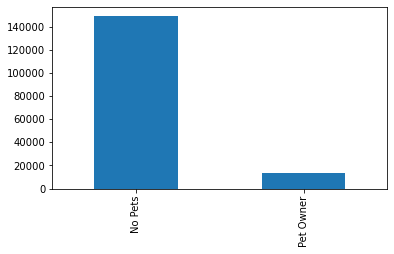

In [106]:
plt.gcf().subplots_adjust(bottom=0.25)
Pet_bar= profiles_pets_diet_wealth_age_family['Pet_Owner_Profile'].value_counts().plot.bar()

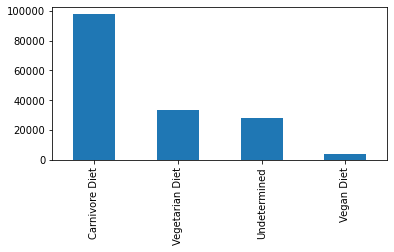

In [107]:
#diet distribution
plt.gcf().subplots_adjust(bottom=0.35)
Diet_bar= profiles_pets_diet_wealth_age_family['Diet_Profile'].value_counts().plot.bar()

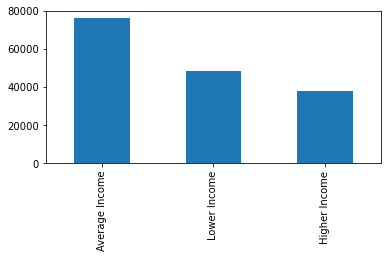

In [108]:
#income distribution
plt.gcf().subplots_adjust(bottom=0.35)
Wealth_bar= profiles_pets_diet_wealth_age_family['Income_Profile'].value_counts().plot.bar()

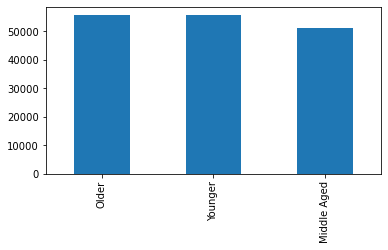

In [109]:
#age distribution
plt.gcf().subplots_adjust(bottom=0.3)
Age_bar= profiles_pets_diet_wealth_age_family['Age_Profile'].value_counts().plot.bar()

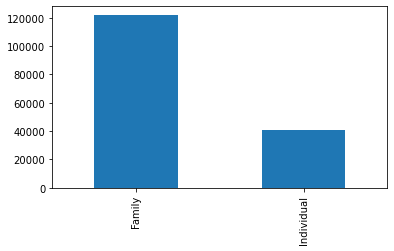

In [110]:
#Family Status distribution
plt.gcf().subplots_adjust(bottom=0.25)
Family_bar= profiles_pets_diet_wealth_age_family['Family_Status_Profile'].value_counts().plot.bar()

# 7.

In [111]:
#merge the profiles dataset with the original data
df_profiles = df.merge(profiles_pets_diet_wealth_age_family, on = 'user_id', how= 'outer', indicator = True)

In [112]:
df_profiles.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,income_category,income_flag,aged,Age_Profile_x,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile_y,Family_Status_Profile,_merge
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both


In [113]:
df_profiles['_merge'].value_counts(dropna= False)

both          30992664
right_only           0
left_only            0
Name: _merge, dtype: int64

In [114]:
#aggregate max, mean, and min variables on customer-profile level for usage frequency and expenditure

In [115]:
#Pet Profile: Do customer's ages differ basd on if they are pet owners?
df_profiles.groupby('Pet_Owner_Profile').agg({'age':['mean', 'min', 'max']})

age        
                        mean min max
Pet_Owner_Profile                   
No Pets            49.443741  18  81
Pet Owner          49.660842  18  81

There seems to be no difference in age between owners and non-pet owners.

In [116]:
#Pet Profile: income and pet ownership
df_profiles.groupby('Pet_Owner_Profile').agg({'income':['mean', 'min', 'max']})

income               
                            mean    min     max
Pet_Owner_Profile                              
No Pets             99034.832599  25903  593901
Pet Owner          104763.663843  26256  591089

On average, pet owners have a higher income.

In [117]:
#Diet Profile: Do customers spend different amounts of money based on their diet?
df_profiles.groupby('Diet_Profile').agg({'prices':['mean', 'min', 'max']})

prices              
                      mean  min      max
Diet_Profile                            
Carnivore Diet   11.998676  1.0  99999.0
Undetermined     13.117344  1.0  99999.0
Vegan Diet        6.968024  1.0     20.0
Vegetarian Diet  11.205974  1.0  99999.0

Customers with a vegan diet spend significantly less than users with other diets.

In [118]:
#Diet Profile: diet and order frequency
df_profiles.groupby('Diet_Profile').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                  mean  min   max
Diet_Profile                                     
Carnivore Diet               10.564650  0.0  30.0
Undetermined                 11.073157  0.0  30.0
Vegan Diet                   13.223032  0.0  30.0
Vegetarian Diet              11.720344  0.0  30.0

Carnivores order more frequently.

In [119]:
#Wealth Profile: income by age
df_profiles.groupby('age').agg({'income':['mean','median','min', 'max']})

income                       
              mean  median    min     max
age                                      
18    70652.501234   68788  26067  357226
19    69883.063492   69227  25972  396364
20    70966.370184   70658  26024  338939
21    70733.473650   70315  25937  372571
22    70022.794044   69422  26070  369192
..             ...     ...    ...     ...
77   116898.142653  117320  30031  512331
78   117517.024472  118074  29113  381735
79   115403.937920  115680  29330  579169
80   114435.768375  113446  30290  569253
81   115426.257331  116165  29834  571932

[64 rows x 4 columns]

The median income was calculated since the mean seemed higher than normal, this did not change the outcome very much. This may be due to Instacart being seen as a luxury service and therefore customers will have higher incomes than the general population. 

In [120]:
#Wealth Profile: income and ordering time
df_profiles.groupby('Income_Profile').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                            mean min max
Income_Profile                          
Average Income         13.437729   0  23
Higher Income          13.452003   0  23
Lower Income           13.315838   0  23

there is no difference in ordering hours based on income.

In [121]:
#Age Profile: age and ordering time
df_profiles.groupby('Age_Profile_y').agg({'order_hour_of_day':['mean', 'min', 'max']})

order_hour_of_day        
                           mean min max
Age_Profile_y                          
Middle Aged           13.418602   0  23
Older                 13.415554   0  23
Younger               13.399042   0  23

there is no difference in ordering hours based on age.

In [122]:
#Age Profile: age and dependents
df_profiles.groupby('Age_Profile_y').agg({'dependents':['mean', 'min', 'max']})

dependents        
                    mean min max
Age_Profile_y                   
Middle Aged     1.495247   0   3
Older           1.507061   0   3
Younger         1.502555   0   3

There is no significant difference in number of dependents based on a user's age profile.

In [123]:
#Family Profile:family and income
df_profiles.groupby('Family_Status_Profile').agg({'income':['mean', 'min', 'max']})

income               
                               mean    min     max
Family_Status_Profile                             
Family                 99599.122688  25911  593901
Individual             99895.555355  25903  584097

There is no clear correlation between family status and a user's income.

In [124]:
#Family Profile:family and age
df_profiles.groupby('Family_Status_Profile').agg({'age':['mean', 'min', 'max']})

age        
                            mean min max
Family_Status_Profile                   
Family                 49.454874  18  81
Individual             49.507118  18  81

There is no clear correlation between family status and a user's age.

# 8.

In [125]:
#compare customer profiles with regions and departments, any links?

In [126]:
#Pet Profile by region
crosstab_pet_region=pd.crosstab(df_profiles['country_region'],df_profiles['Pet_Owner_Profile'], dropna=False )
crosstab_pet_region

Pet_Owner_Profile,No Pets,Pet Owner
country_region,,
Mid West,6439726,827981
North East,4871316,598752
South,9202136,1118326
West,7025845,908582


All regions have a similar ratio of pet owners and non-owners, with non-pet owners being more common.

In [127]:
#pet profile by department_id
crosstab_pet_department=pd.crosstab(df_profiles['department_id'],df_profiles['Pet_Owner_Profile'], dropna=False )
crosstab_pet_department

Pet_Owner_Profile,No Pets,Pet Owner
department_id,,
1,1843265,280077
2,29218,5193
3,987099,137927
4,8309662,769614
5,118116,26558
6,225074,30917
7,2252578,319356
8,0,93065
9,721902,100234


In [128]:
#Diet profile by region
crosstab_diet_region=pd.crosstab(df_profiles['country_region'],df_profiles['Diet_Profile'], dropna=False )
crosstab_diet_region

Diet_Profile,Carnivore Diet,Undetermined,Vegan Diet,Vegetarian Diet
country_region,,,,
Mid West,5391076,618834,38230,1219567
North East,4080093,454644,30309,905022
South,7680881,865474,55479,1718628
West,5923175,675570,43656,1292026


Of the MidWest users, 74% are carnivores, 8.5% have undetermined diets, .5% are vegan, 17% are vegetarian.
Of the North East Users, 74.5% are carnivores, 8.4% have undetermined diets, .6% are vegan, 16.5% are vegatarian.
Of the Southern Users, 74.4% are carnivores, 8.4% have undetermined diets, .5% are vegan, 16.7% are vegatarian.
Of the Westerners Users, 74.7% are carnivores, 8.5% have undetermined diets, .6% are vegan, 16.3% are vegatarian.

There are no differences in diet based on location

In [129]:
#diet profile by department_id
crosstab_diet_department=pd.crosstab(df_profiles['department_id'],df_profiles['Diet_Profile'], dropna=False )
crosstab_diet_department

Diet_Profile,Carnivore Diet,Undetermined,Vegan Diet,Vegetarian Diet
department_id,,,,
1,1611622,138482,8113,365125
2,23645,4104,288,6374
3,868046,77386,2580,177014
4,6954318,654071,73370,1397517
5,80885,28005,3809,31975
6,198644,13725,592,43030
7,1658394,367653,26167,519720
8,69899,6596,290,16280
9,670073,37917,1222,112924


In [130]:
#income profile by region
crosstab_income_region=pd.crosstab(df_profiles['country_region'],df_profiles['Income_Profile'], dropna=False )
crosstab_income_region

Income_Profile,Average Income,Higher Income,Lower Income
country_region,,,
Mid West,3631713,1843691,1792303
North East,2727585,1374284,1368199
South,5173237,2551358,2595867
West,3963573,1978933,1991921


User Totals:
MW:7267707 NE:5470068 S:10320462 W:7934427
Income Totals:
A:15496108 H:7748266  L:7748290

In the Mid West user's incomes are: 50% average, 25.4% high, 24.6% low.
In the North East user's incomes are: 49.9% average, 25.1% high, 25% low.
In the South user's incomes are: 50.1% average, 24.7% high, 25.2% low.
In the West user's incomes are: 50% average, 24.9% high, 25.1% low.

All regions have very similar income statistics. The South has the highest percentage of low income users and the Mid West has the highest percentage of high income users.

In [131]:
#income profile by department_id
crosstab_income_department=pd.crosstab(df_profiles['department_id'],df_profiles['Income_Profile'], dropna=False )
crosstab_income_department

Income_Profile,Average Income,Higher Income,Lower Income
department_id,,,
1,1070386,541570,511386
2,17127,8711,8573
3,567015,291202,266809
4,4664929,2289686,2124661
5,66961,40885,36828
6,132924,65342,57725
7,1210197,618574,743163
8,46348,24963,21754
9,429239,212923,179974


In [132]:
#age profile by region
crosstab_age_region=pd.crosstab(df_profiles['country_region'],df_profiles['Age_Profile_y'], dropna=False )
crosstab_age_region

Age_Profile_y,Middle Aged,Older,Younger
country_region,,,
Mid West,2325092,2457349,2485266
North East,1710462,1886052,1873554
South,3184413,3524584,3611465
West,2514106,2715956,2704365


The Mid West and South have more younger users while the North East and West have more oler users.

In [133]:
#age profile by department_id
crosstab_age_department=pd.crosstab(df_profiles['department_id'],df_profiles['Age_Profile_y'], dropna=False )
crosstab_age_department

Age_Profile_y,Middle Aged,Older,Younger
department_id,,,
1,666568,729439,727335
2,10689,11604,12118
3,353973,383651,387402
4,2846302,3104121,3128853
5,45382,47630,51662
6,80697,86448,88846
7,814071,883680,874183
8,29388,31757,31920
9,258535,280102,283499


In [134]:
#family status profile by region
crosstab_family_region=pd.crosstab(df_profiles['country_region'],df_profiles['Family_Status_Profile'], dropna=False )
crosstab_family_region

Family_Status_Profile,Family,Individual
country_region,,
Mid West,5443220,1824487
North East,4114240,1355828
South,7736110,2584352
West,5952062,1982365


In all regions, Instacart users are about 300% more likely to be families than individuals.

In [135]:
#family status profile by department_id
crosstab_family_department=pd.crosstab(df_profiles['department_id'],df_profiles['Family_Status_Profile'], dropna=False )
crosstab_family_department

Family_Status_Profile,Family,Individual
department_id,,
1,1593593,529749
2,25697,8714
3,842540,282486
4,6803834,2275442
5,107822,36852
6,191530,64461
7,1926585,645349
8,69463,23602
9,617840,204296


In [136]:
#money spent Profile by hour
crosstab_prices_hour=pd.crosstab(df['prices'],df['order_hour_of_day'], dropna=False )
crosstab_prices_hour

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
prices,,,,,,,,,,,,,,,,,,,,,
1.0,741,341,223,178,189,313,901,2938,5310,7814,...,9299,9322,8793,7396,5792,4305,3316,2608,2028,1290
1.1,1643,834,485,369,385,695,2221,6650,12803,17751,...,18958,18609,17833,14702,11597,9282,7282,6198,4969,3073
1.2,1586,815,493,373,410,679,2021,6306,12482,17815,...,20441,20209,19431,15958,12237,9225,7162,5906,4493,2854
1.3,2695,1407,855,537,696,1138,3961,12232,22851,32015,...,33300,32668,31238,25578,20591,15788,12499,10426,8285,5245
1.4,2555,1296,777,521,591,1028,3350,10669,20378,28977,...,31354,30505,28391,23056,17750,13610,10977,9629,7610,4710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24.8,2,1,1,2,1,1,2,4,19,25,...,23,31,39,29,19,11,9,11,9,9
24.9,34,18,11,8,7,17,69,194,304,377,...,477,513,432,375,314,217,169,99,93,52
25.0,97,31,29,17,16,36,133,355,667,919,...,1096,1160,1071,899,639,458,362,320,268,141


# 9.

In [137]:
#produce charts to illustrate results

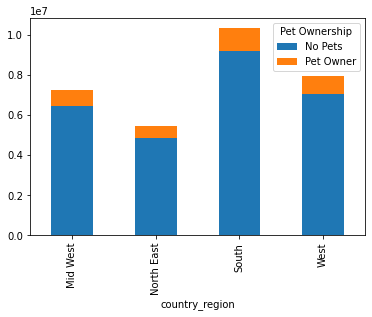

In [138]:
#pet and regions stacked bar
pet_region_profile= crosstab_pet_region.plot.bar(stacked= True)
plt.legend(title='Pet Ownership')

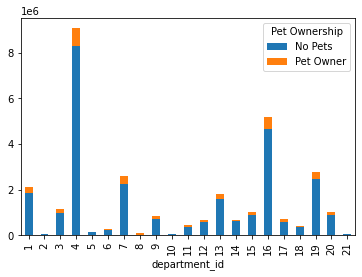

In [139]:
#pet and department stacked bar
pet_department_profile= crosstab_pet_department.plot.bar(stacked= True)
plt.legend(title='Pet Ownership')

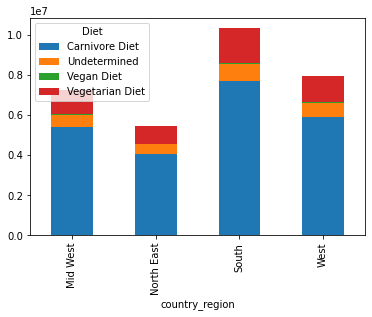

In [140]:
#diet and region stacked bar
diet_region_profile= crosstab_diet_region.plot.bar(stacked= True)
plt.legend(title='Diet')

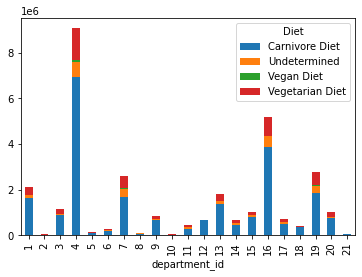

In [141]:
#diet and department stacked bar
diet_department_profile= crosstab_diet_department.plot.bar(stacked= True)
plt.legend(title='Diet')

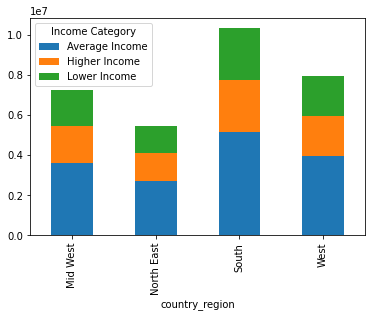

In [142]:
#income and region stacked bar
income_region_profile= crosstab_income_region.plot.bar(stacked= True)
plt.legend(title='Income Category')

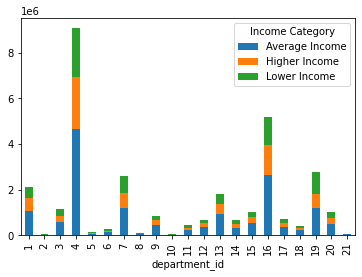

In [143]:
#income and department stacked bar
income_department_profile= crosstab_income_department.plot.bar(stacked= True)
plt.legend(title='Income Category')

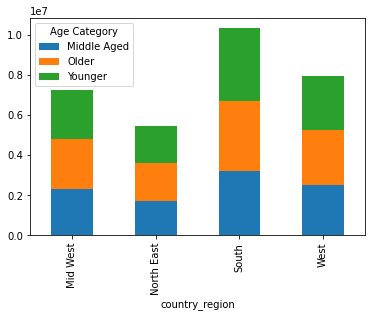

In [144]:
#age and region stacked bar
age_region_profile= crosstab_age_region.plot.bar(stacked= True)
plt.legend(title='Age Category')

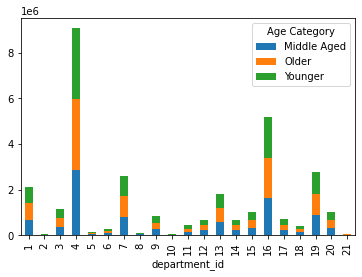

In [145]:
#age and department stacked bar
age_department_profile= crosstab_age_department.plot.bar(stacked= True)
plt.legend(title='Age Category')

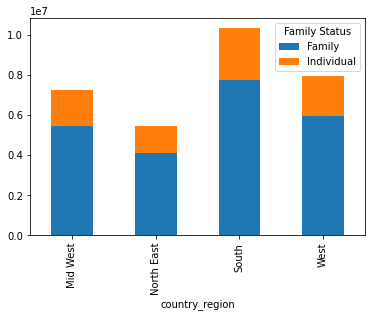

In [146]:
#family and region stacked bar
family_region_profile= crosstab_family_region.plot.bar(stacked= True)
plt.legend(title='Family Status')

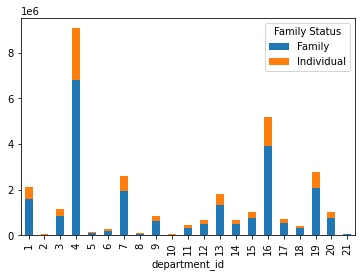

In [147]:
#family and department stacked bar
family_department_profile= crosstab_family_department.plot.bar(stacked= True)
plt.legend(title='Family Status')

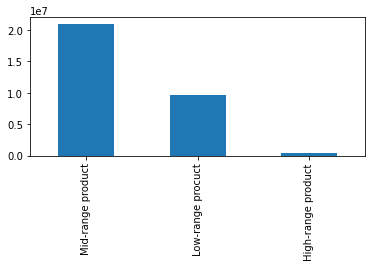

In [148]:
#distribution of products in each price range
plt.gcf().subplots_adjust(bottom=0.4)
price_range_bar= df['price_range_loc'].value_counts().plot.bar()

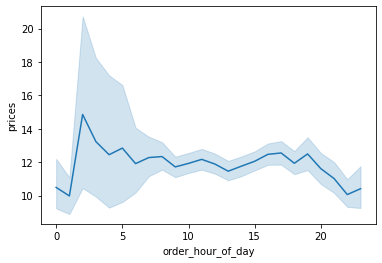

In [149]:
#money spent per hour line graph
money_hour_line= sns.lineplot(data= df, x= 'order_hour_of_day', y= 'prices')

In [150]:
#export visualizations

In [151]:
Pet_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\pets_barchart.png')

In [152]:
Diet_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\diet_barchart.png')

In [153]:
Wealth_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\wealth_barchart.png')

In [154]:
Age_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_barchart.png')

In [155]:
Family_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\family_barchart.png')

In [156]:
pet_region_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\pet_region_profile_barchart.png')

In [157]:
pet_department_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\pet_department_profile_barchart.png')

In [158]:
diet_region_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\diet_region_profile_barchart.png')

In [159]:
diet_department_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\diet_department_profile_barchart.png')

In [160]:
income_region_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_region_profile_barchart.png')

In [161]:
income_department_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_department_profile_barchart.png')

In [162]:
age_region_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_region_profile_barchart.png')

In [163]:
age_department_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_department_profile_barchart.png')

In [164]:
family_region_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\family_region_profile_barchart.png')

In [165]:
family_department_profile.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\family_department_profile_barchart.png')

In [166]:
money_hour_line.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\money_spent_hour.png')

In [167]:
price_range_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\products_per_price_range.png')

# 10.

#### Additional Analysis Needed

In [168]:
#family and ordering crosstab
crosstab_family_ordering=pd.crosstab(df_profiles['days_since_prior_order'],df_profiles['Family_Status_Profile'], dropna=False )
crosstab_family_ordering


Family_Status_Profile,Family,Individual
days_since_prior_order,,
0.0,325543,112803
1.0,696287,236022
2.0,1086928,365566
3.0,1397138,464323
4.0,1542489,516884
5.0,1572064,527367
6.0,1863406,617699
7.0,2568386,852233
8.0,1425335,470299


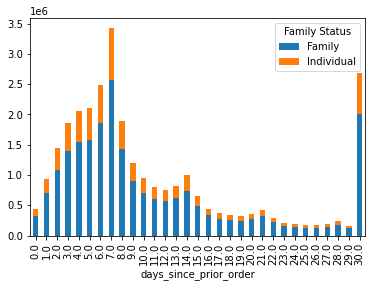

In [169]:
#family and ordering stacked bar
family_ordering_bar= crosstab_family_ordering.plot.bar(stacked= True)
plt.legend(title='Family Status')

In [170]:
#save figure
family_ordering_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\family_ordering_bar.png')

In [171]:
#age and ordering crosstab
crosstab_age_ordering=pd.crosstab(df_profiles['days_since_prior_order'],df_profiles['Age_Profile_y'], dropna=False )
crosstab_age_ordering

Age_Profile_y,Middle Aged,Older,Younger
days_since_prior_order,,,
0.0,138703,152403,147240
1.0,294384,320111,317814
2.0,457825,496948,497721
3.0,578945,641147,641369
4.0,644094,710326,704953
5.0,659856,718910,720665
6.0,782073,845476,853556
7.0,1068002,1166560,1186057
8.0,596658,641287,657689


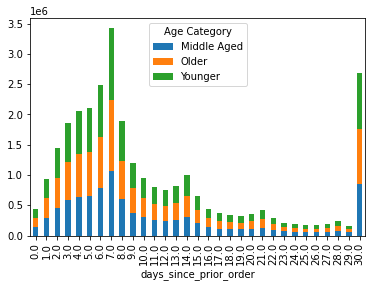

In [172]:
#age and ordering stacked bar
age_ordering_bar= crosstab_age_ordering.plot.bar(stacked= True)
plt.legend(title='Age Category')

In [173]:
#save figure
age_ordering_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\age_ordering_bar.png')

In [174]:
#family and loyalty crosstab
crosstab_family_loyalty=pd.crosstab(df_profiles['Family_Status_Profile'],df_profiles['loyalty_flag'], dropna=False )
crosstab_family_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
Family_Status_Profile,,,
Family,7702117,3605514,11938001
Individual,2591620,1202336,3953076


<Figure size 432x288 with 0 Axes>

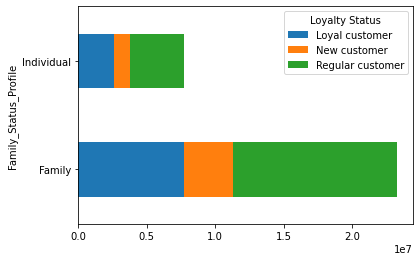

In [208]:
#family and loyalty stacked bar
plt.gcf().subplots_adjust(left=0.89)
family_loyalty_bar= crosstab_family_loyalty.plot.barh(stacked= True)
plt.legend(title='Loyalty Status')

In [209]:
#save figure
family_loyalty_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\family_loyalty_bar.png')

In [177]:
#income and loyalty crosstab
crosstab_income_loyalty=pd.crosstab(df_profiles['Income_Profile'],df_profiles['loyalty_flag'], dropna=False )
crosstab_income_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
Income_Profile,,,
Average Income,5226562,2321085,7948461
Higher Income,2568805,1173957,4005504
Lower Income,2498370,1312808,3937112


<Figure size 432x288 with 0 Axes>

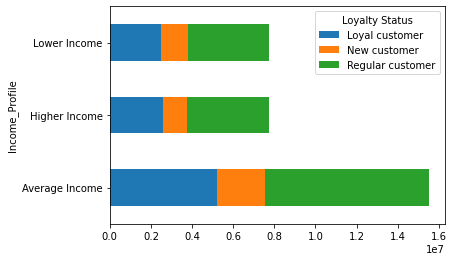

In [241]:
#income and loyalty stacked bar
plt.gcf().subplots_adjust(left=0.6)
income_loyalty_bar= crosstab_income_loyalty.plot.barh(stacked= True)
plt.legend(title='Loyalty Status')

In [242]:
#save figure
income_loyalty_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_loyalty_bar.png')

In [180]:
#region and ordering crosstab
crosstab_region_ordering=pd.crosstab(df_profiles['days_since_prior_order'],df_profiles['country_region'], dropna=False )
crosstab_region_ordering

country_region,Mid West,North East,South,West
days_since_prior_order,,,,
0.0,101813,78372,147415,110746
1.0,216588,164338,307830,243553
2.0,337085,255891,486396,373122
3.0,427924,335126,621050,477361
4.0,473020,367936,685080,533337
5.0,486336,373451,699145,540499
6.0,576227,434617,828835,641426
7.0,804405,605396,1131154,879664
8.0,446920,331391,631053,486270


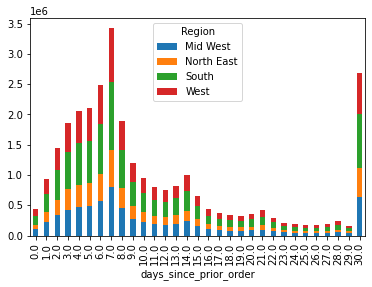

In [181]:
#region and ordering stacked bar
region_ordering_bar= crosstab_region_ordering.plot.bar(stacked= True)
plt.legend(title='Region')

In [182]:
#save figure
region_ordering_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_loyalty_bar.png')

In [183]:
#region and loyalty crosstab
crosstab_region_loyalty=pd.crosstab(df_profiles['country_region'],df_profiles['loyalty_flag'], dropna=False )
crosstab_region_ordering

country_region,Mid West,North East,South,West
days_since_prior_order,,,,
0.0,101813,78372,147415,110746
1.0,216588,164338,307830,243553
2.0,337085,255891,486396,373122
3.0,427924,335126,621050,477361
4.0,473020,367936,685080,533337
5.0,486336,373451,699145,540499
6.0,576227,434617,828835,641426
7.0,804405,605396,1131154,879664
8.0,446920,331391,631053,486270


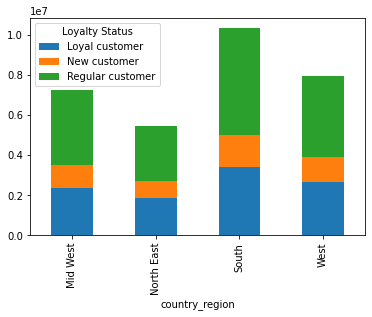

In [184]:
#region and loyalty stacked bar
region_loyalty_bar= crosstab_region_loyalty.plot.bar(stacked= True)
plt.legend(title='Loyalty Status')

In [185]:
#save figure
region_loyalty_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_loyalty_bar.png')

In [186]:
df_profiles['Pet_Owner_Profile'].value_counts(dropna= False)

No Pets      27539023
Pet Owner     3453641
Name: Pet_Owner_Profile, dtype: int64

In [187]:
df_profiles['Diet_Profile'].value_counts(dropna= False)

Carnivore Diet     23075225
Vegetarian Diet     5135243
Undetermined        2614522
Vegan Diet           167674
Name: Diet_Profile, dtype: int64

In [188]:
df_profiles['Income_Profile'].value_counts(dropna= False)

Average Income    15496108
Lower Income       7748290
Higher Income      7748266
Name: Income_Profile, dtype: int64

In [189]:
df_profiles['Age_Profile_y'].value_counts(dropna= False)

Younger        10674650
Older          10583941
Middle Aged     9734073
Name: Age_Profile_y, dtype: int64

In [190]:
df_profiles['Family_Status_Profile'].value_counts(dropna= False)

Family        23245632
Individual     7747032
Name: Family_Status_Profile, dtype: int64

In [191]:
df_profiles['Diet_Profile'].value_counts()

Carnivore Diet     23075225
Vegetarian Diet     5135243
Undetermined        2614522
Vegan Diet           167674
Name: Diet_Profile, dtype: int64

In [210]:
#region and department crosstab
crosstab_region_department=pd.crosstab(df_profiles['country_region'],df_profiles['department_id'], dropna=False )
crosstab_region_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
country_region,,,,,,,,,,,,,,,,,,,,,
Mid West,498527,7983,262614,2134116,34052,60666,598990,21358,193463,7929,...,158261,420366,157781,237459,1215821,166992,95741,645143,234464,15563
North East,370817,6268,200136,1593004,25034,44678,462931,17734,143817,5599,...,118572,312763,119327,176936,917293,124604,72712,493154,178398,11512
South,710443,11579,373055,3027478,48822,84649,859435,29912,272813,11180,...,224122,591842,225539,337458,1727823,230062,139511,916780,333620,21787
West,543555,8581,289221,2324678,36766,65998,650578,24061,212043,8743,...,173830,457932,175448,260221,1330891,178200,102428,711329,257352,15906


In [211]:
#save results to clipboard
crosstab_region_department.to_clipboard()

In [215]:
#income and prices crosstab
crosstab_income_prices=pd.crosstab(df_profiles['Income_Profile'],df_profiles['prices'], dropna=False )
crosstab_income_prices

prices,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,24.3,24.4,24.5,24.6,24.7,24.8,24.9,25.0,14900.0,99999.0
Income_Profile,,,,,,,,,,,,,,,,,,,,,
Average Income,53638,108980,117287,190640,180361,70332,132520,98212,141855,67544,...,1504,240,1068,943,3984,208,2977,7126,638,101
Higher Income,27231,54365,60243,96288,88685,36507,68429,48204,69708,35063,...,751,142,610,533,1836,111,1638,3792,3580,553
Lower Income,28393,68992,65168,120215,105753,40444,84385,58217,96002,46033,...,492,79,359,369,1207,67,851,2210,5,0


In [219]:
df_income_prices= df_profiles.groupby('Income_Profile').agg({'prices':['mean']})

<Figure size 432x288 with 0 Axes>

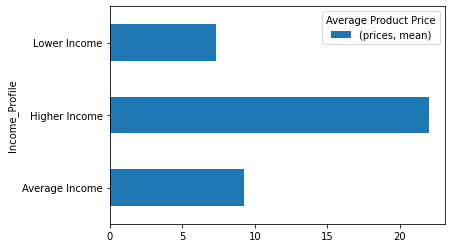

In [229]:
#region and department crosstab
plt.gcf().subplots_adjust(bottom=0.8)
income_spending_bar= df_income_prices.plot.barh()
plt.legend(title='Average Product Price')

In [230]:
#save figure
income_spending_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_spending_bar.png')

In [231]:
#income and days between order
df_income_days= df_profiles.groupby('Income_Profile').agg({'days_since_prior_order':['mean']})

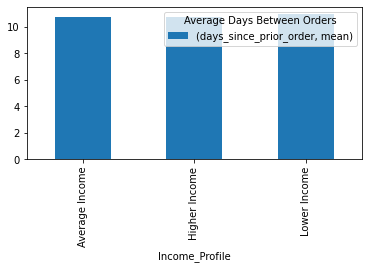

In [237]:

income_days_bar= df_income_days.plot.bar()
plt.gcf().subplots_adjust(bottom=0.35)
plt.legend(title='Average Days Between Orders')

In [238]:
#save figure
income_days_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\income_days_bar.png')

In [243]:
#average price by loyalty status
df_loyalty_prices= df_profiles.groupby('loyalty_flag').agg({'prices':['mean']})

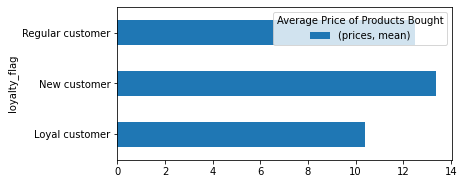

In [247]:
#price by loyalty status bar
loyalty_prices_bar= df_loyalty_prices.plot.barh()
plt.gcf().subplots_adjust(bottom=0.35)
plt.legend(title='Average Price of Products Bought')

In [248]:
#save figure
loyalty_prices_bar.figure.savefig(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\04 Analysis\Visualizations\loyalty_prices_bar.png')

In [192]:
#export data set

In [193]:
df_profiles.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,income_category,income_flag,aged,Age_Profile_x,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile_y,Family_Status_Profile,_merge
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,40423,Lower Income,31,Younger,No Pets,Undetermined,Lower Income,Younger,Family,both


In [249]:
df_profiles.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_status',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'merged', 'price_range_loc',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spending_category', 'spending_flag', 'behavior_category',
       'behavior_flag', 'gender', 'state', 'age', 'date_joined', 'dependents',
       'marital_status', 'income', 'country_region', 'activity_category',
       'activity_flag', 'income_category', 'income_flag', 'aged',
       'Age_Profile_x', 'Pet_Owner_Profile', 'Diet_Profile', 'Income_Profile',
       'Age_Profile_y', 'Family_Status_Profile', '_merge'],
      dtype='object')

In [250]:
df_profiles_cleaned=df_profiles.drop(columns = ['merged','activity_category','spending_category','behavior_category','income_category','aged',
       'Age_Profile_x', '_merge'])

In [251]:
df_profiles_cleaned.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,customer_status,product_id,add_to_cart_order,reordered,...,marital_status,income,country_region,activity_flag,income_flag,Pet_Owner_Profile,Diet_Profile,Income_Profile,Age_Profile_y,Family_Status_Profile
0,2539329,1,1,2,8,NaN,New Customer,196,1,0,...,married,40423,South,High Activity,Lower Income,No Pets,Undetermined,Lower Income,Younger,Family
1,2398795,1,2,3,7,15.0,Returning Customer,196,1,1,...,married,40423,South,High Activity,Lower Income,No Pets,Undetermined,Lower Income,Younger,Family
2,473747,1,3,3,12,21.0,Returning Customer,196,1,1,...,married,40423,South,High Activity,Lower Income,No Pets,Undetermined,Lower Income,Younger,Family
3,2254736,1,4,4,7,29.0,Returning Customer,196,1,1,...,married,40423,South,High Activity,Lower Income,No Pets,Undetermined,Lower Income,Younger,Family
4,431534,1,5,4,15,28.0,Returning Customer,196,1,1,...,married,40423,South,High Activity,Lower Income,No Pets,Undetermined,Lower Income,Younger,Family


In [252]:
df_profiles_cleaned.to_pickle(r'C:\Users\kickw\OneDrive\Documents\Instacart Basket Analysis\02 Data\Prepared Data\profiles_cleaned.pkl')